In [96]:
#Source :  Kaggle : 
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#model packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb


In [3]:
data = pd.read_csv("C:\Education\Kaggle\credit fraud\creditcard.csv")

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Checking Missing values

In [14]:
print
tot = data.isnull().sum()
per = (data.isnull().sum()/data.isnull().count())*100
missing = pd.concat([tot, per], axis = 1, keys= ['# missing', '% missing'])
missing.transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
# missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory analysis

In [37]:
t = pd.DataFrame(.value_counts()) 

,Class
0,284315
1,492


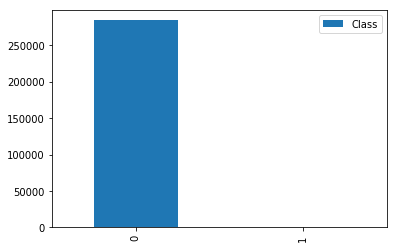

In [38]:
t.plot.bar()

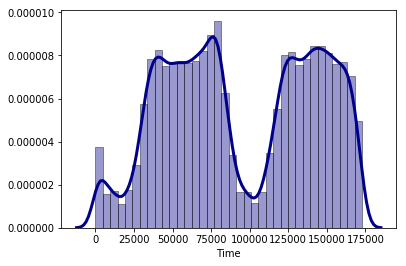

In [48]:
# Density Plot and Histogram of Time
sns.distplot(data['Time'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

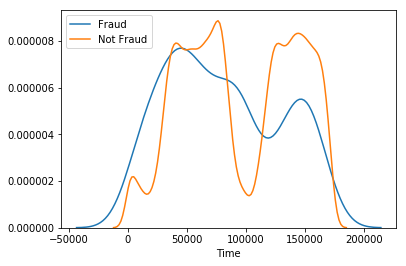

In [54]:
#Time density plot for various fraud reasons
f_Time = data[data.Class == 1]["Time"]
nf_Time = data[data.Class == 0]["Time"]
sns.distplot(f_Time,hist = False, kde=True,bins=480, label = "Fraud")
sns.distplot(nf_Time,hist = False, kde=True,bins=480, label = "Not Fraud")
plt.show()

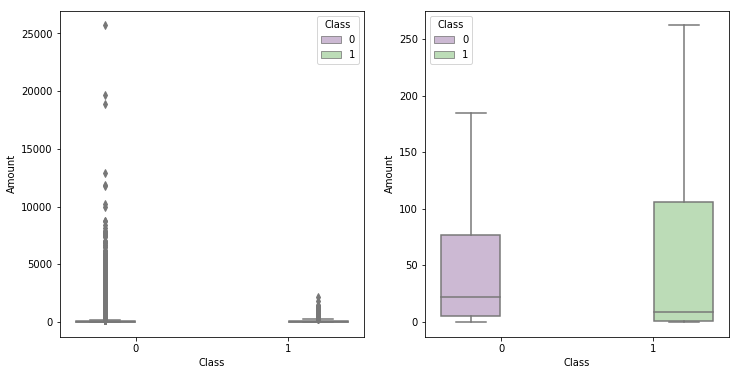

In [75]:
# Amount distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s=sns.boxplot(ax = ax1, x= "Class", y = "Amount", hue = "Class", data = data,palette="PRGn",showfliers=True)
s=sns.boxplot(ax = ax2, x= "Class", y = "Amount", hue = "Class", data = data,palette="PRGn", showfliers=False)
plt.show();

# Correlation and other exploration

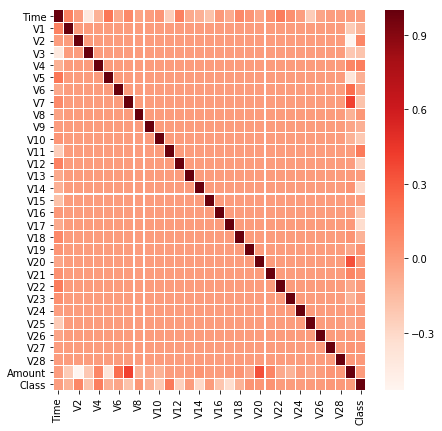

In [81]:
# Correlation 
plt.figure(figsize=(7,7))
cor = data.corr()
sns.heatmap(cor, linewidths=.1,cmap="Reds")

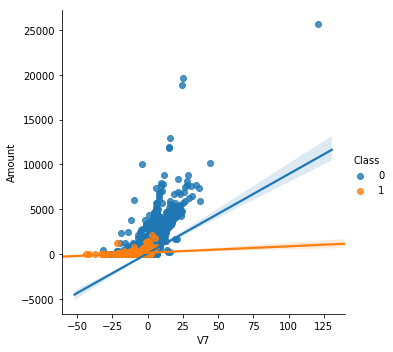

In [83]:
# Direct plots for V7 and V20 with respect to amount
sns.lmplot(data= data, x = "V7", y="Amount", hue = "Class", fit_reg= True)

<Figure size 432x288 with 0 Axes>

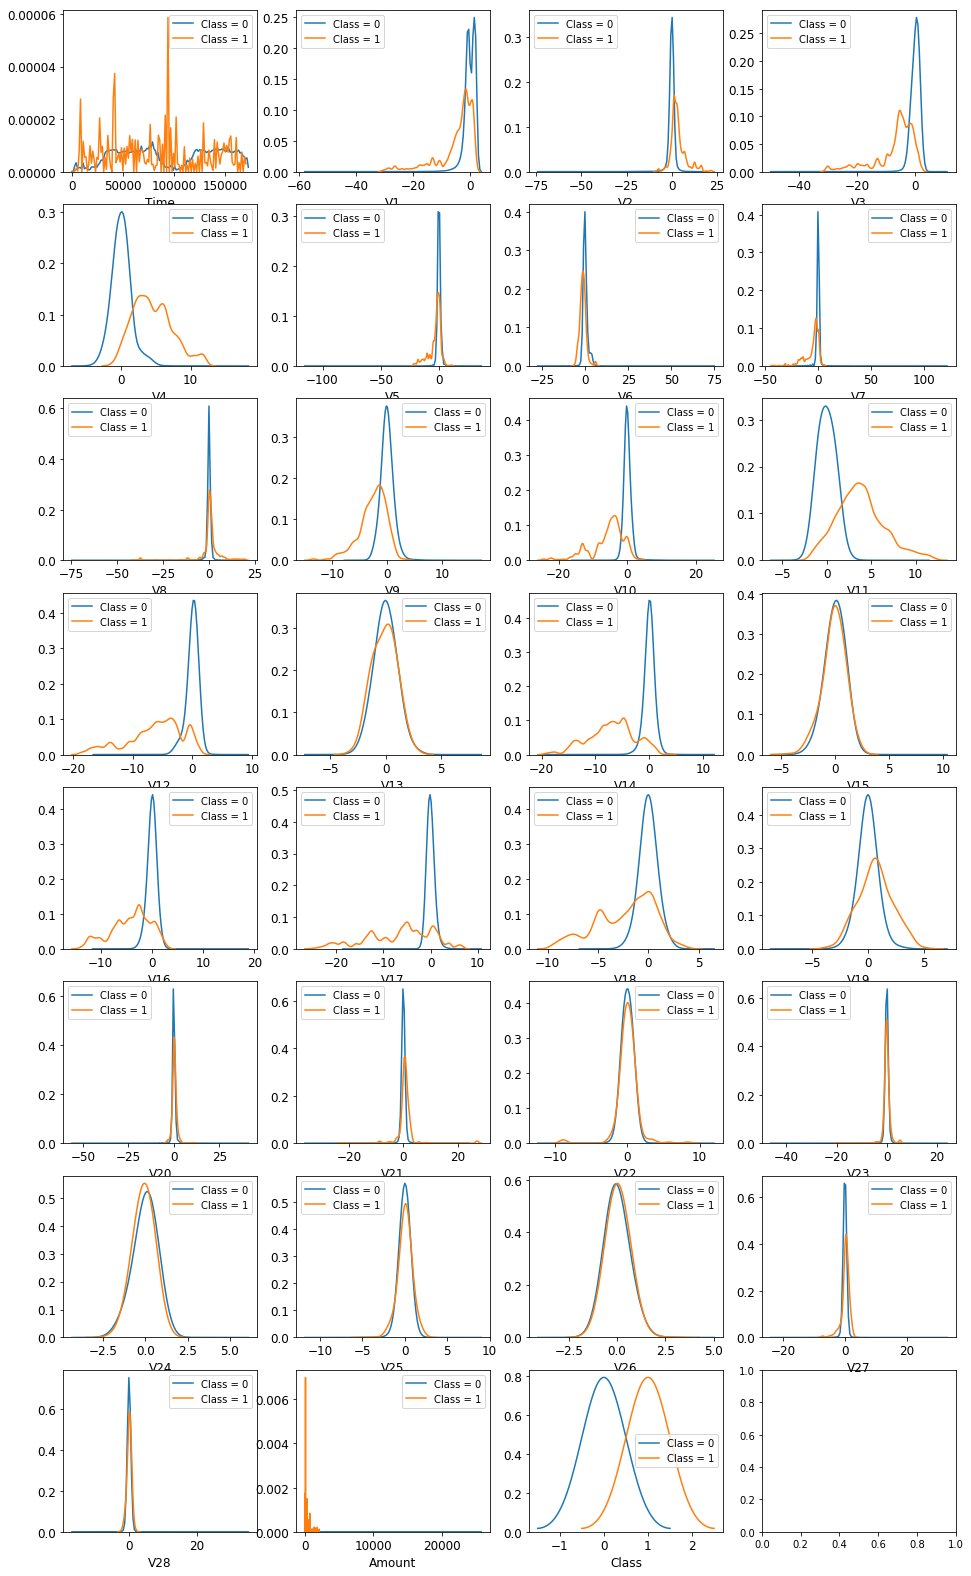

In [92]:
# Density plot
variable = data.columns.values

i=0
f0 = data[data.Class == 0]
f1 = data[data.Class == 1]

plt.figure()
fig, ax = plt.subplots(8,4, figsize = (16,28))


for feature in variable:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(f0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(f1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# Model

In [116]:
target = 'Class'
predictors = data.iloc[:,1:30].columns.values

#Test train split
train, test = train_test_split(data, test_size = 0.2, random_state = 2018, shuffle = True)
train, valid = train_test_split(train, test_size = 0.2, random_state = 2018, shuffle = True)


### Model - Random forest

In [117]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [118]:
clf.fit(train[predictors], train[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [119]:
preds = clf.predict(valid[predictors])

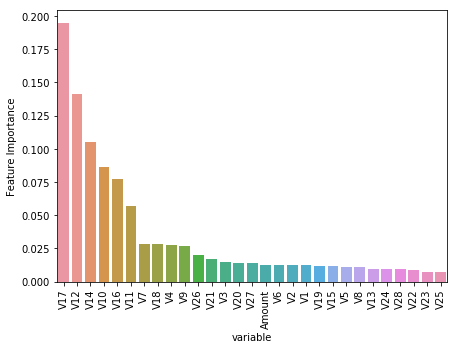

In [120]:
#Feature Importances
tmp = pd.DataFrame({'variable':predictors, 'Feature Importance':clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
plt.figure(figsize = (7,5))
chart = sns.barplot(x = 'variable', y = 'Feature Importance', data = tmp)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show();

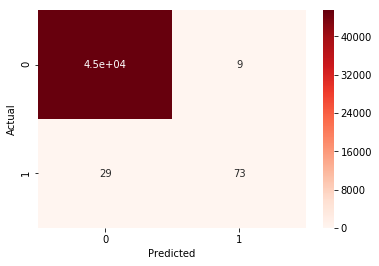

In [130]:
#confusion matrix
conf = pd.crosstab(valid[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf, annot= True , cmap = 'Reds')

In [137]:
print("Recall : ", int((73/(29+73))*100), "%" )
print("Precision: ", (73/(73+9))*100)
roc_auc_score(valid[target].values, preds)

Recall :  71 %
Precision:  89.02439024390245


0.8577441643734715

### Adaboost classifier 

In [139]:
clf = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)
clf.fit(train[predictors], train[target].values)
preds = clf.predict(valid[predictors])

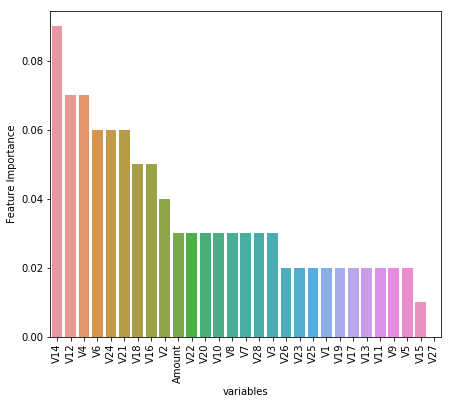

In [141]:
#Feature Importance
tmp = pd.DataFrame({'variables': predictors, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
plt.figure(figsize = (7,6))
x = sns.barplot(x = 'variables', y='Feature Importance', data = tmp)
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
plt.show()

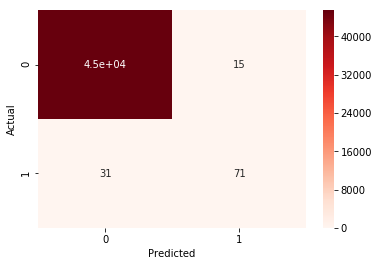

In [143]:
# confusion matrix
cm = pd.crosstab(valid[target].values, preds, rownames= ['Actual'], colnames= ['Predicted'])
sns.heatmap(cm, cmap = 'Reds', annot = True)

In [144]:
print("Recall : ", int((73/(29+73))*100), "%" )
print("Precision: ", (73/(73+9))*100)
roc_auc_score(valid[target].values, preds)

Recall :  71 %
Precision:  89.02439024390245


0.8478742608838903

### Catboost classifier

In [145]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2018,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [146]:
clf.fit(train[predictors], train[target].values, verbose = True)

0:	total: 1.83s	remaining: 15m 16s
50:	total: 1m 13s	remaining: 10m 51s
100:	total: 2m 19s	remaining: 9m 10s
150:	total: 3m 24s	remaining: 7m 52s
200:	total: 4m 34s	remaining: 6m 48s
250:	total: 5m 37s	remaining: 5m 34s
300:	total: 6m 50s	remaining: 4m 31s
350:	total: 7m 53s	remaining: 3m 21s
400:	total: 8m 54s	remaining: 2m 11s
450:	total: 9m 55s	remaining: 1m 4s
499:	total: 10m 56s	remaining: 0us


In [147]:
preds = clf.predict(valid[predictors])

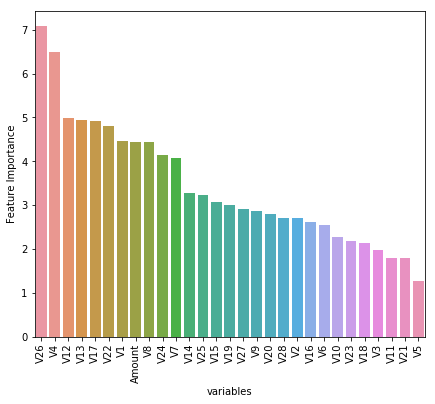

In [148]:
#Feature Importance
tmp = pd.DataFrame({'variables': predictors, 'Feature Importance' : clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature Importance', ascending = False)
plt.figure(figsize = (7,6))
x = sns.barplot(x = 'variables', y='Feature Importance', data = tmp)
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
plt.show()

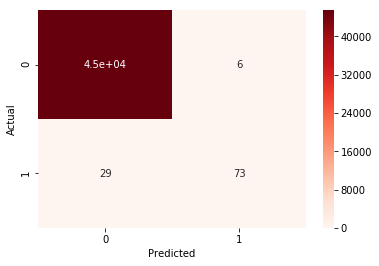

In [149]:
# confusion matrix
cm = pd.crosstab(valid[target].values, preds, rownames= ['Actual'], colnames= ['Predicted'])
sns.heatmap(cm, cmap = 'Reds', annot = True)

In [150]:
print("Recall : ", int((73/(29+73))*100), "%" )
print("Precision: ", (73/(73+6))*100)
roc_auc_score(valid[target].values, preds)

Recall :  71 %
Precision:  92.40506329113924


0.8577771553339484

### XGBoosting